# ISLR Chapter - 02 Statistical Learning

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Q8 a)

In [2]:
college = pd.read_csv('/content/College.csv')

In [3]:
college.head()

Unnamed: 0 Private  Apps  ...  perc.alumni  Expend  Grad.Rate
0  Abilene Christian University     Yes  1660  ...           12    7041         60
1            Adelphi University     Yes  2186  ...           16   10527         56
2                Adrian College     Yes  1428  ...           30    8735         54
3           Agnes Scott College     Yes   417  ...           37   19016         59
4     Alaska Pacific University     Yes   193  ...            2   10922         15

[5 rows x 19 columns]

### Q-8 b)

In [4]:
#just slicing the dataset to remove the unnamed column 
college = college.iloc[: , 1:]
college.head()

Private  Apps  Accept  Enroll  ...  S.F.Ratio  perc.alumni  Expend  Grad.Rate
0     Yes  1660    1232     721  ...       18.1           12    7041         60
1     Yes  2186    1924     512  ...       12.2           16   10527         56
2     Yes  1428    1097     336  ...       12.9           30    8735         54
3     Yes   417     349     137  ...        7.7           37   19016         59
4     Yes   193     146      55  ...       11.9            2   10922         15

[5 rows x 18 columns]

###Q-8 c)   i )

In [5]:
college.describe()

Apps        Accept  ...        Expend  Grad.Rate
count    777.000000    777.000000  ...    777.000000  777.00000
mean    3001.638353   2018.804376  ...   9660.171171   65.46332
std     3870.201484   2451.113971  ...   5221.768440   17.17771
min       81.000000     72.000000  ...   3186.000000   10.00000
25%      776.000000    604.000000  ...   6751.000000   53.00000
50%     1558.000000   1110.000000  ...   8377.000000   65.00000
75%     3624.000000   2424.000000  ...  10830.000000   78.00000
max    48094.000000  26330.000000  ...  56233.000000  118.00000

[8 rows x 17 columns]

###Q8 c) ii)

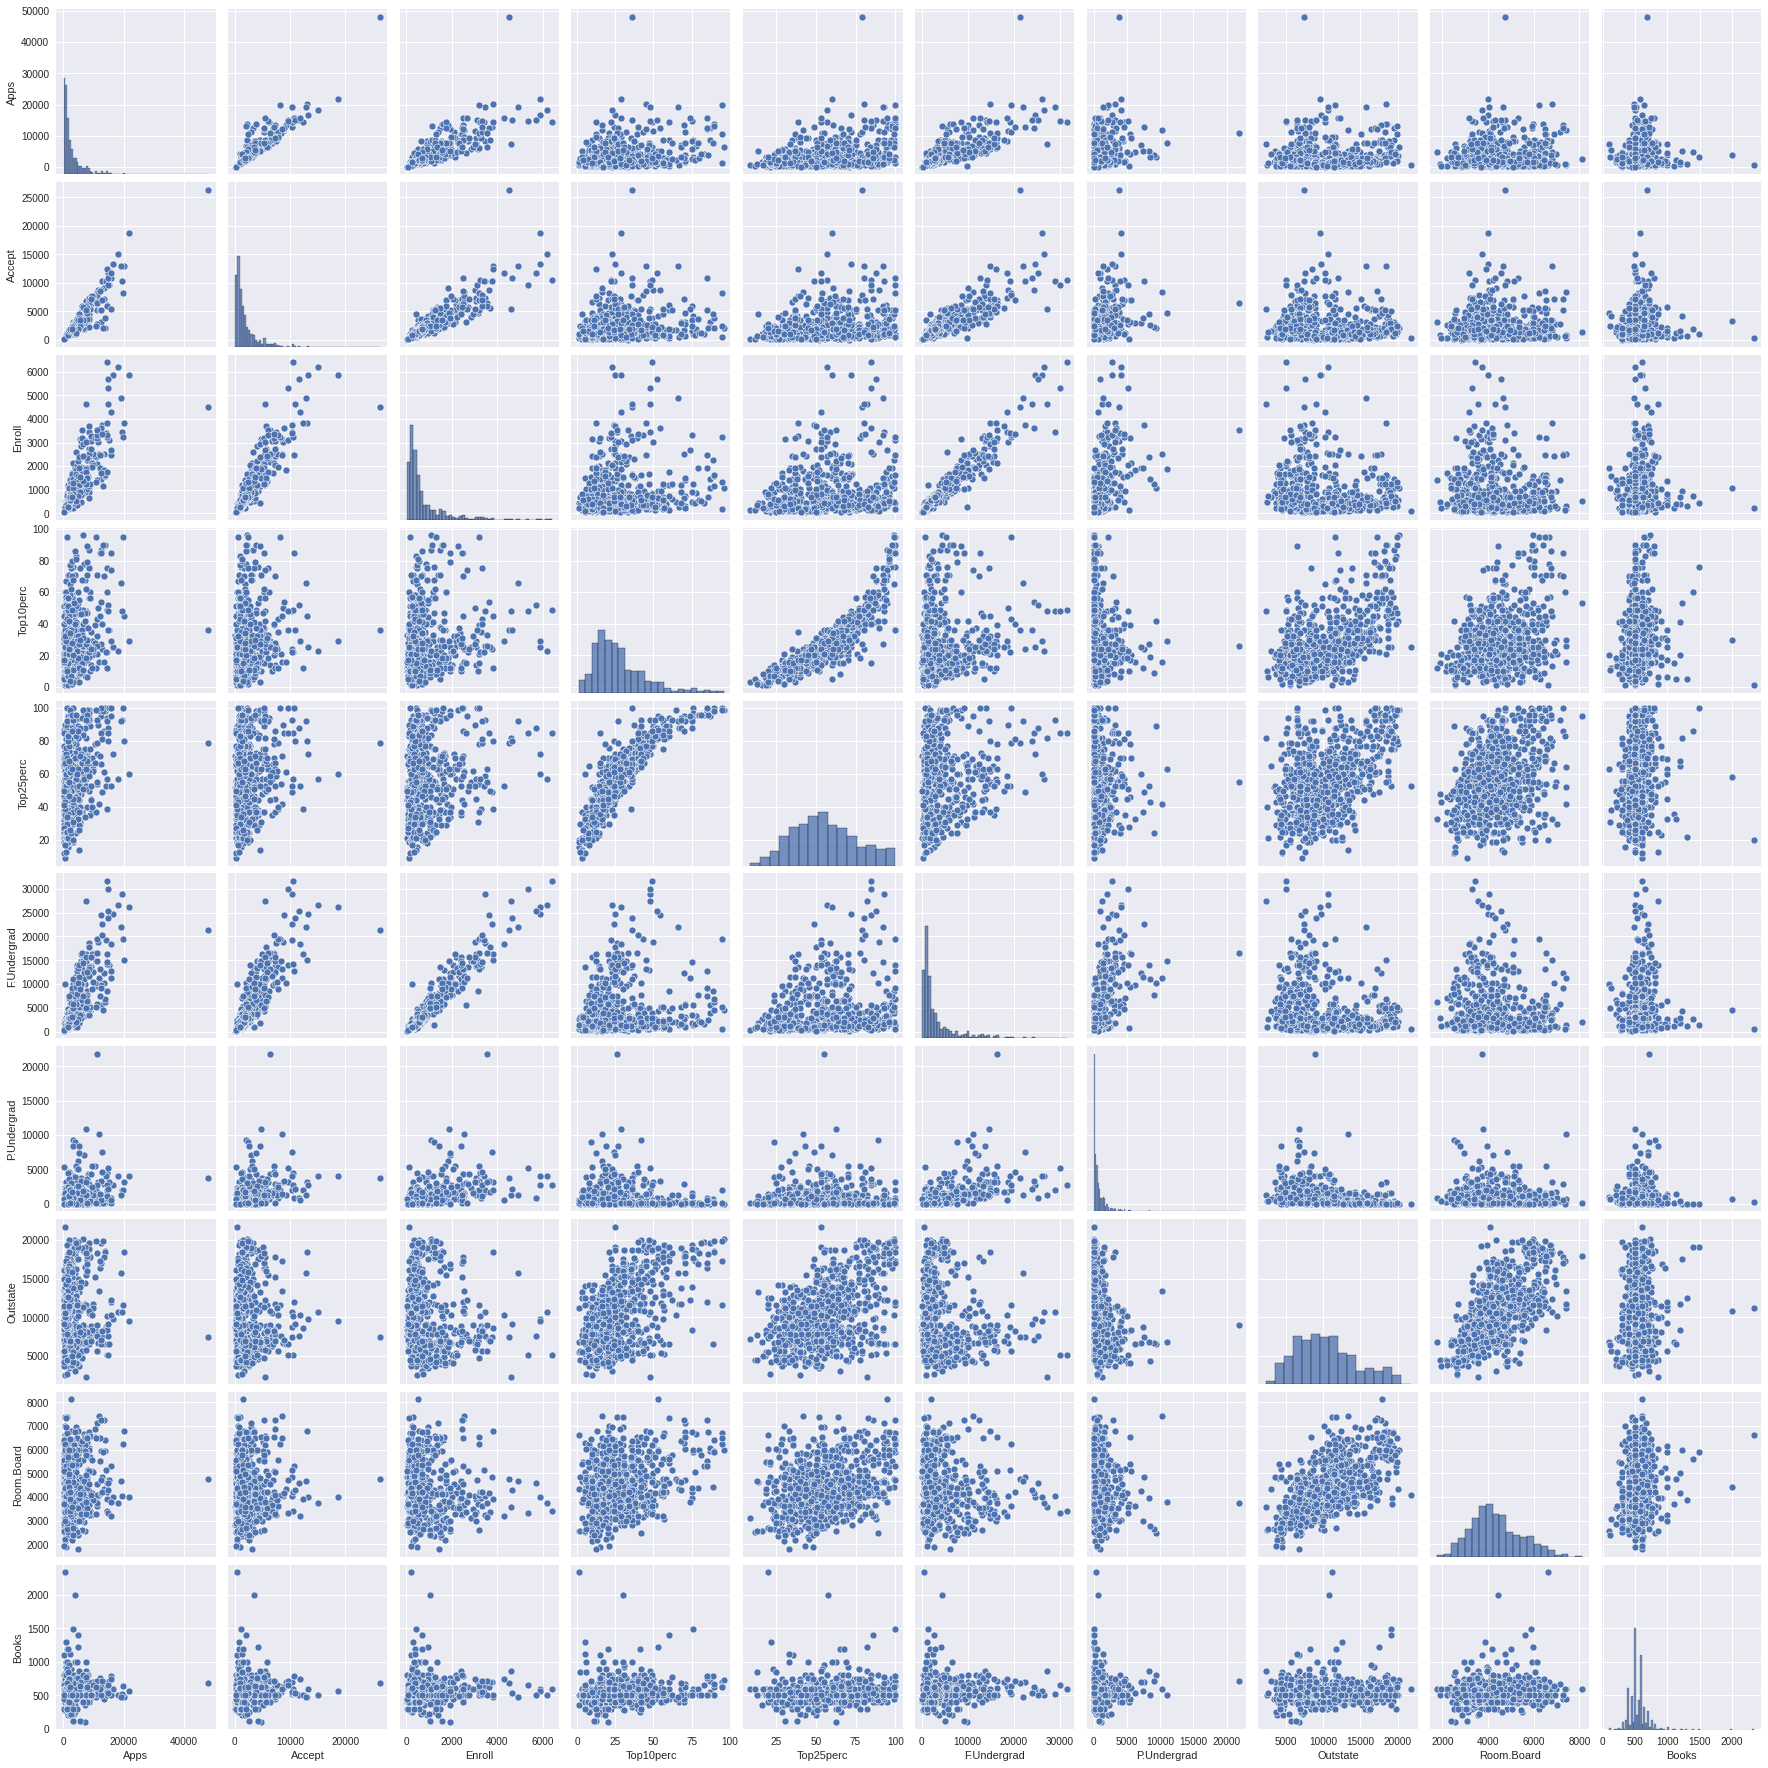

In [6]:
plt.style.use('seaborn')
sns.pairplot(data = college ,vars = college.iloc[:,1:11].columns.values,palette='Set3')
plt.show()

### Q8 c) iii)


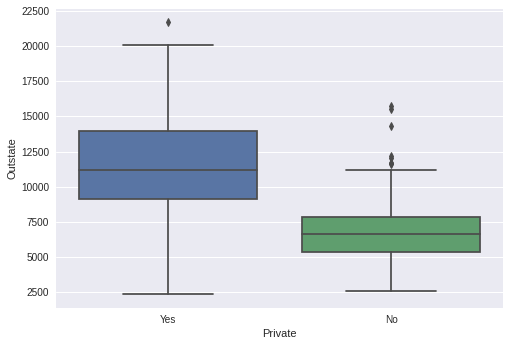

In [7]:
sns.boxplot(data = college , x = 'Private' , y= 'Outstate')
plt.show()

###Q8 c) iv)


In [8]:
college['Elite'] = ['Yes' if college['Top10perc'][i] > 50 else 'No' for i in range(0,777)]
college['Elite'].value_counts()

No     699
Yes     78
Name: Elite, dtype: int64

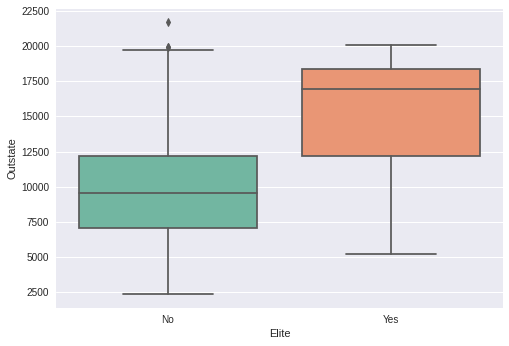

In [9]:
#continue
sns.boxplot(data = college , x ='Elite' , y = 'Outstate' , palette='Set2')
plt.show()

###Q8 c) v)


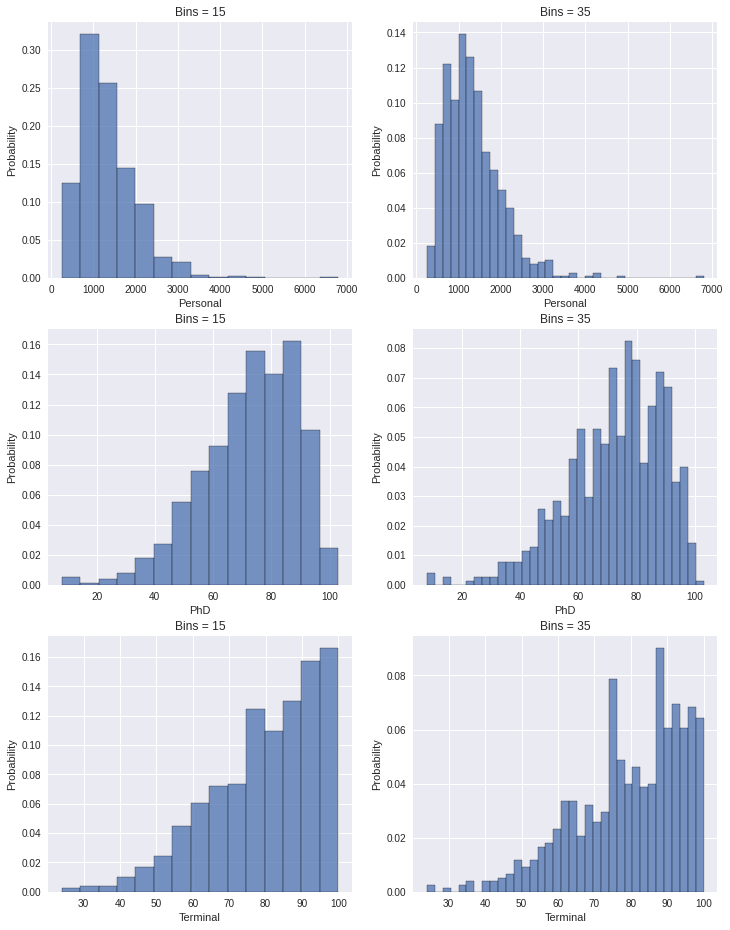

In [10]:
cols = college.iloc[:,11:14].columns.values
bins = [15,35]
figs , axe = plt.subplots(len(cols),len(bins) , figsize = [12,16])
for i in range(len(cols)):
    for j in range(len(bins)):
      a = sns.histplot(data = college ,x = cols[i], fill = True , bins = bins[j] ,stat = 'probability' ,ax = axe[i,j])
      a.set_title(f'Bins = {bins[j]}')

## Q9

In [11]:
Auto = pd.read_csv('/content/Auto.csv')

In [12]:
Auto.head()

mpg  cylinders  displacement  ...  year  origin                       name
0  18.0          8         307.0  ...    70       1  chevrolet chevelle malibu
1  15.0          8         350.0  ...    70       1          buick skylark 320
2  18.0          8         318.0  ...    70       1         plymouth satellite
3  16.0          8         304.0  ...    70       1              amc rebel sst
4  17.0          8         302.0  ...    70       1                ford torino

[5 rows x 9 columns]

###Q9 a)


In [13]:
for i in Auto.columns.values[:7]:
  print(f'{i.upper()} ----- is quantitative')
for i in Auto.columns.values[7:]:
  print(f'{i.upper()} ----- is quanlitative')

MPG ----- is quantitative
CYLINDERS ----- is quantitative
DISPLACEMENT ----- is quantitative
HORSEPOWER ----- is quantitative
WEIGHT ----- is quantitative
ACCELERATION ----- is quantitative
YEAR ----- is quantitative
ORIGIN ----- is quanlitative
NAME ----- is quanlitative


###Q9 b) 


In [14]:
Range = pd.DataFrame([[min(Auto.iloc[:,i]) for i in range(7)],[max(Auto.iloc[:,i]) for i in range(7)]] ,
                   columns=Auto.columns.values[:7] , index = ['min' , 'max'])
Range

mpg  cylinders  displacement  horsepower  weight  acceleration  year
min   9.0          3          68.0          46    1613           8.0    70
max  46.6          8         455.0         230    5140          24.8    82

###Q9 c)

In [15]:
mean_std = pd.DataFrame([[np.mean(Auto.iloc[:,i]) for i in range(7)],[np.std(Auto.iloc[:,i]) for i in range(7)]] ,
                   columns=Auto.columns.values[:7] , index = ['mean' , 'stdev'])

mean_std

mpg  cylinders  displacement  ...       weight  acceleration       year
mean   23.445918   5.471939    194.411990  ...  2977.584184     15.541327  75.979592
stdev   7.795046   1.703606    104.510444  ...   848.318447      2.755343   3.679035

[2 rows x 7 columns]

###Q9 d)

In [16]:
subsample = Auto.drop(index = range(10,86))
subsample
Range_drop = pd.DataFrame([[min(subsample.iloc[:,i]) for i in range(7)],[max(subsample.iloc[:,i]) for i in range(7)]] ,
                   columns=Auto.columns.values[:7] , index = ['min' , 'max'])
Range_drop

mpg  cylinders  displacement  horsepower  weight  acceleration  year
min  11.0          3          68.0          46    1649           8.5    70
max  46.6          8         455.0         230    4997          24.8    82

In [17]:
#continued
mean_std = pd.DataFrame([[np.mean(subsample.iloc[:,i]) for i in range(7)],[np.std(subsample.iloc[:,i]) for i in range(7)]] ,
                   columns=Auto.columns.values[:7] , index = ['mean' , 'stdev'])
mean_std

mpg  cylinders  displacement  ...       weight  acceleration       year
mean   24.407595   5.373418    187.512658  ...  2936.534810     15.717405  77.136076
stdev   7.850833   1.651559     99.956081  ...   810.588821      2.709579   3.118518

[2 rows x 7 columns]

###Q9 e)

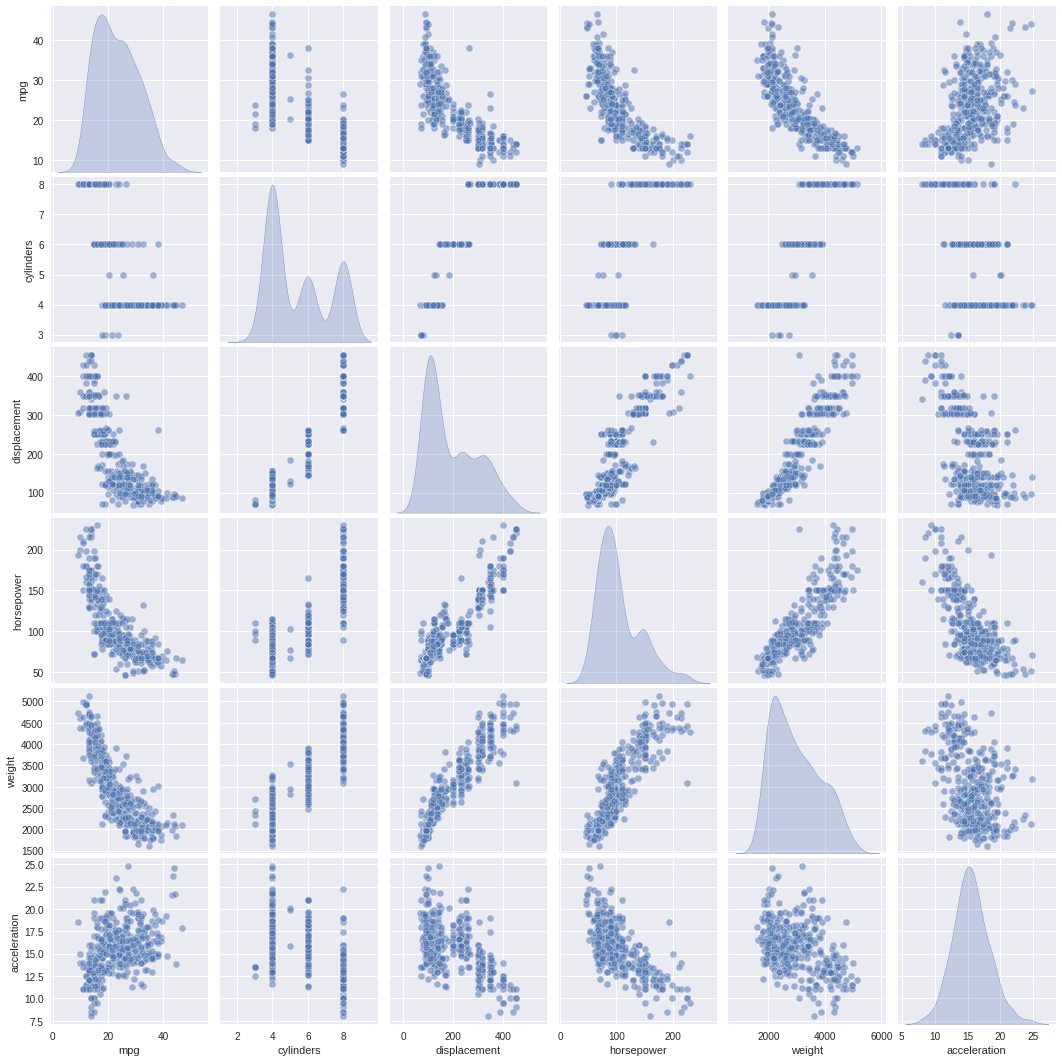

In [18]:
#https://stackoverflow.com/questions/47200033/how-to-adjust-transparency-alpha-in-seaborn-pairplot for setting alpha 
sns.pairplot(data = Auto , vars= Auto.columns.values[:6] , palette = 'Set3' , diag_kind = 'kde' ,plot_kws =  {'alpha':0.5} )
plt.show()

Observations -

1) mpg is negatively correlated with engine displacement, and the r/s is not entirely linear so using spearman's rank correlation would be a better option. There is similar relationship between (mpg, horsepower) and (mpg, weight). and these graphs look like negative exponential.

2) mpg looks weakly postively correlated with acceleration.
 
3) Engine displacement postively correlated with horsepower and weight.

4) Horsepower is positively correlated with weight and negatively correlated with acceleration



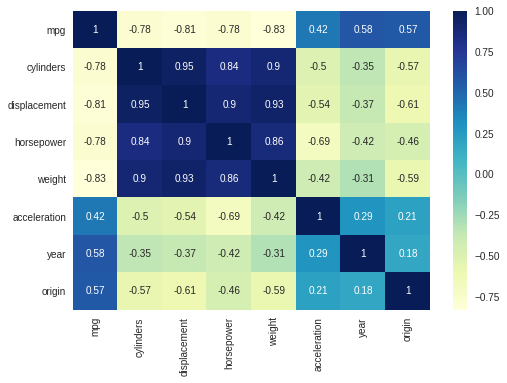

In [19]:
#continue
sns.heatmap(Auto.corr(), annot = True , cmap = "YlGnBu")
plt.show()

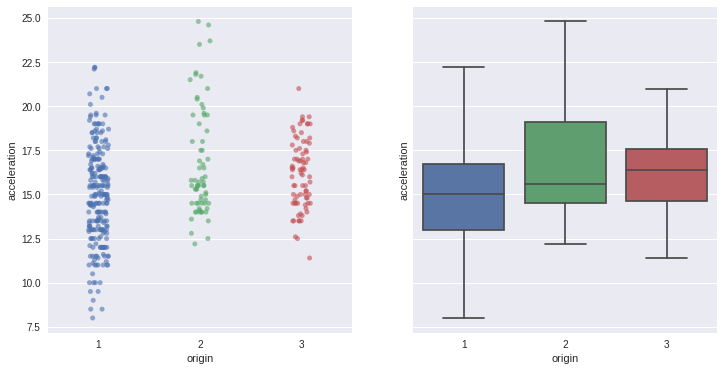

In [20]:
#continue
# Lets check if there is any relation between acceleration and country of origin 
fig , (ax1, ax2) = plt.subplots(1,2 , sharey = True , figsize = [12,6])
sns.stripplot(data = Auto , x= 'origin' , y = 'acceleration' , alpha = 0.6 , ax = ax1)
sns.boxplot(data = Auto , x= 'origin' , y = 'acceleration' , ax= ax2)
plt.show()

##Observation - 

European cars have highest acceleration followed by Japanese and American.
I think we would expect a opposite relationship with Horsepower, as acceleration and Horsepower are negatively correlated. So American origin cars will have higher Horsepower.

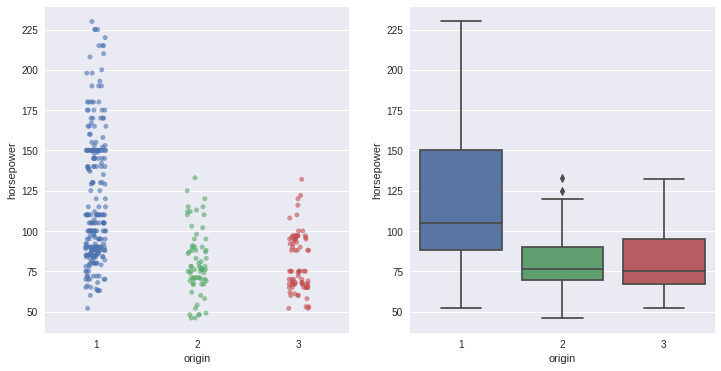

In [21]:
# Lets check if our speculation is True, that is American cars will have high Horsepower
fig , (ax1, ax2) = plt.subplots(1,2  , figsize = [12,6])
sns.stripplot(data = Auto , x= 'origin' , y = 'horsepower' , alpha = 0.6 , ax = ax1)
sns.boxplot(data = Auto , x= 'origin' , y = 'horsepower' , ax= ax2)
plt.show()

##Observation 

American cars do have higher horsepower, 75% of American cars have horsepower greater than 83, on the other hand for European and Janpanese origin cars only 25% have horsepower greater than 83.

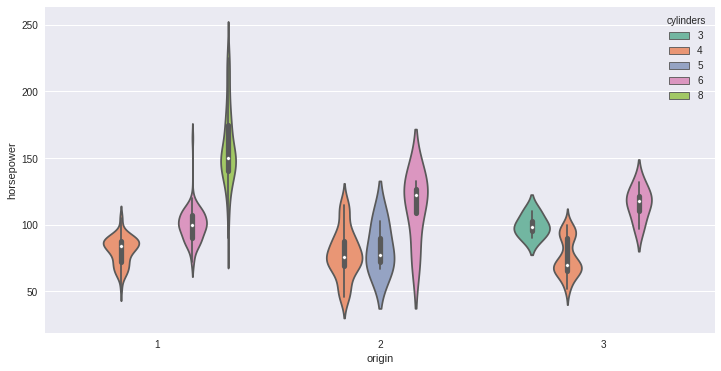

In [22]:
# continue
# Lets bring cylinders into our plots
plt.figure(figsize = [12,6]) 
g = sns.violinplot(data = Auto,  x= 'origin' , y = 'horsepower' ,hue = 'cylinders', alpha = 0.9
                , height = 6, aspect = 1.5, palette = 'Set2', dodge =True , s= 7 )
plt.show()

# Observation

It was known already that horsepower and cylinders are positvely related. So, it is alright to presume that American cars will have more number of cylinders. It can be seen that there are much more American cars having cylinder greater than 6 cylinders. 

### Q9 f)

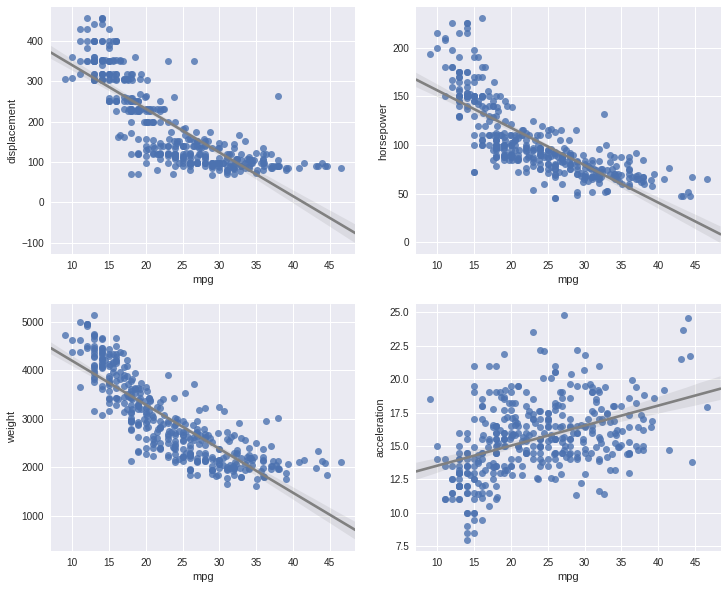

In [23]:
cols = Auto.columns.values[2:6]
plt.figure(figsize = [12,10])
for i in range(1,5):
  ax = plt.subplot(2,2,i)
  sns.regplot(x = "mpg", y = cols[i-1] ,  data = Auto , order = 1 ,ax = ax,truncate= False , line_kws={'color':'grey'}) 
plt.show()

##Observation-

MPG is negatively correlated with displacement , weight and acceleration. Maybe with polynomial of order 2 and regularization, the regression could capture more information. Acceleration feature does not provide much information.

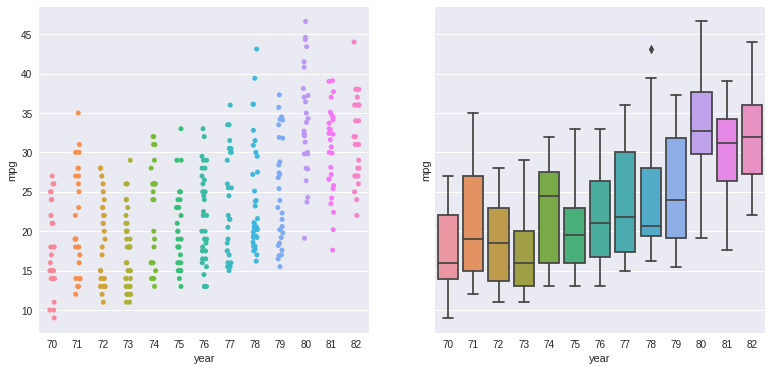

In [24]:
#continue
fig ,(ax1,ax2) = plt.subplots(1,2, figsize = [13, 6], sharey = True)
sns.stripplot(data = Auto , y= 'mpg' , x = 'year' , ax = ax1)
sns.boxplot(data = Auto , y= 'mpg' , x = 'year' , ax = ax2)
plt.show()

# Observation -

It looks like mpg is slowly increasing with years, specially in the last 3 years (80,81,82).

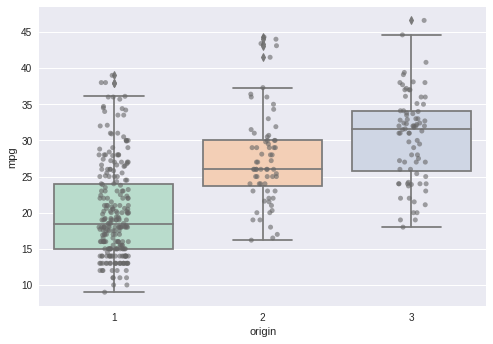

In [25]:
#continue
sns.stripplot(data = Auto , x='origin' , y ='mpg',alpha = 0.6,color=".4")
sns.boxplot(data = Auto , x='origin' , y ='mpg' , palette = 'Pastel2')
plt.show()

#Observation

Median MPG is very small for American cars compared to European and Japanese origin cars, 75% of American origin cars have mpg <= 24. While around 50% Japanese cars have mpg >= 32 and 25% of European cars have mpg >= 30.

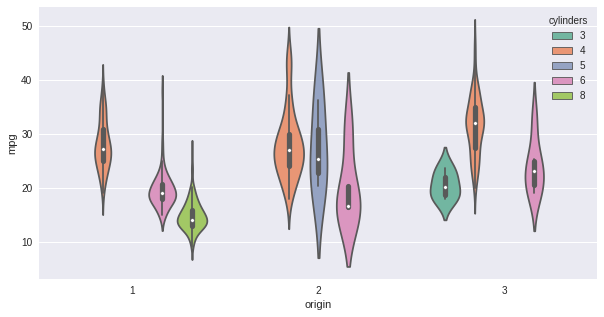

In [26]:
#continue
#brining cylinders into the mix 
plt.figure(figsize = [10,5])
sns.violinplot(data = Auto , x= 'origin' , y = 'mpg' , hue ='cylinders' , dodge = True , palette='Set2')
plt.show()

#Observation - 

Irrespective of origin , the most cars having 4 or 5 cylinders have higher mpg. 

##Q-10 a)

In [27]:
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html
from sklearn.datasets import load_boston
boston_data = load_boston()
boston = pd.DataFrame(np.concatenate((boston_data.data , boston_data.target.reshape(-1,1)) , axis = 1) ,
                      columns = np.append(boston_data.feature_names , 'MEDIAN VALUE'))
boston.head()

CRIM    ZN  INDUS  CHAS  ...  PTRATIO       B  LSTAT  MEDIAN VALUE
0  0.00632  18.0   2.31   0.0  ...     15.3  396.90   4.98          24.0
1  0.02731   0.0   7.07   0.0  ...     17.8  396.90   9.14          21.6
2  0.02729   0.0   7.07   0.0  ...     17.8  392.83   4.03          34.7
3  0.03237   0.0   2.18   0.0  ...     18.7  394.63   2.94          33.4
4  0.06905   0.0   2.18   0.0  ...     18.7  396.90   5.33          36.2

[5 rows x 14 columns]

In [28]:
boston.shape # 506 rows and 14 columns -- 13 features and 1 target  

(506, 14)

In [29]:
print(boston_data.DESCR) # all the information about the dataset

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Q-10 b)

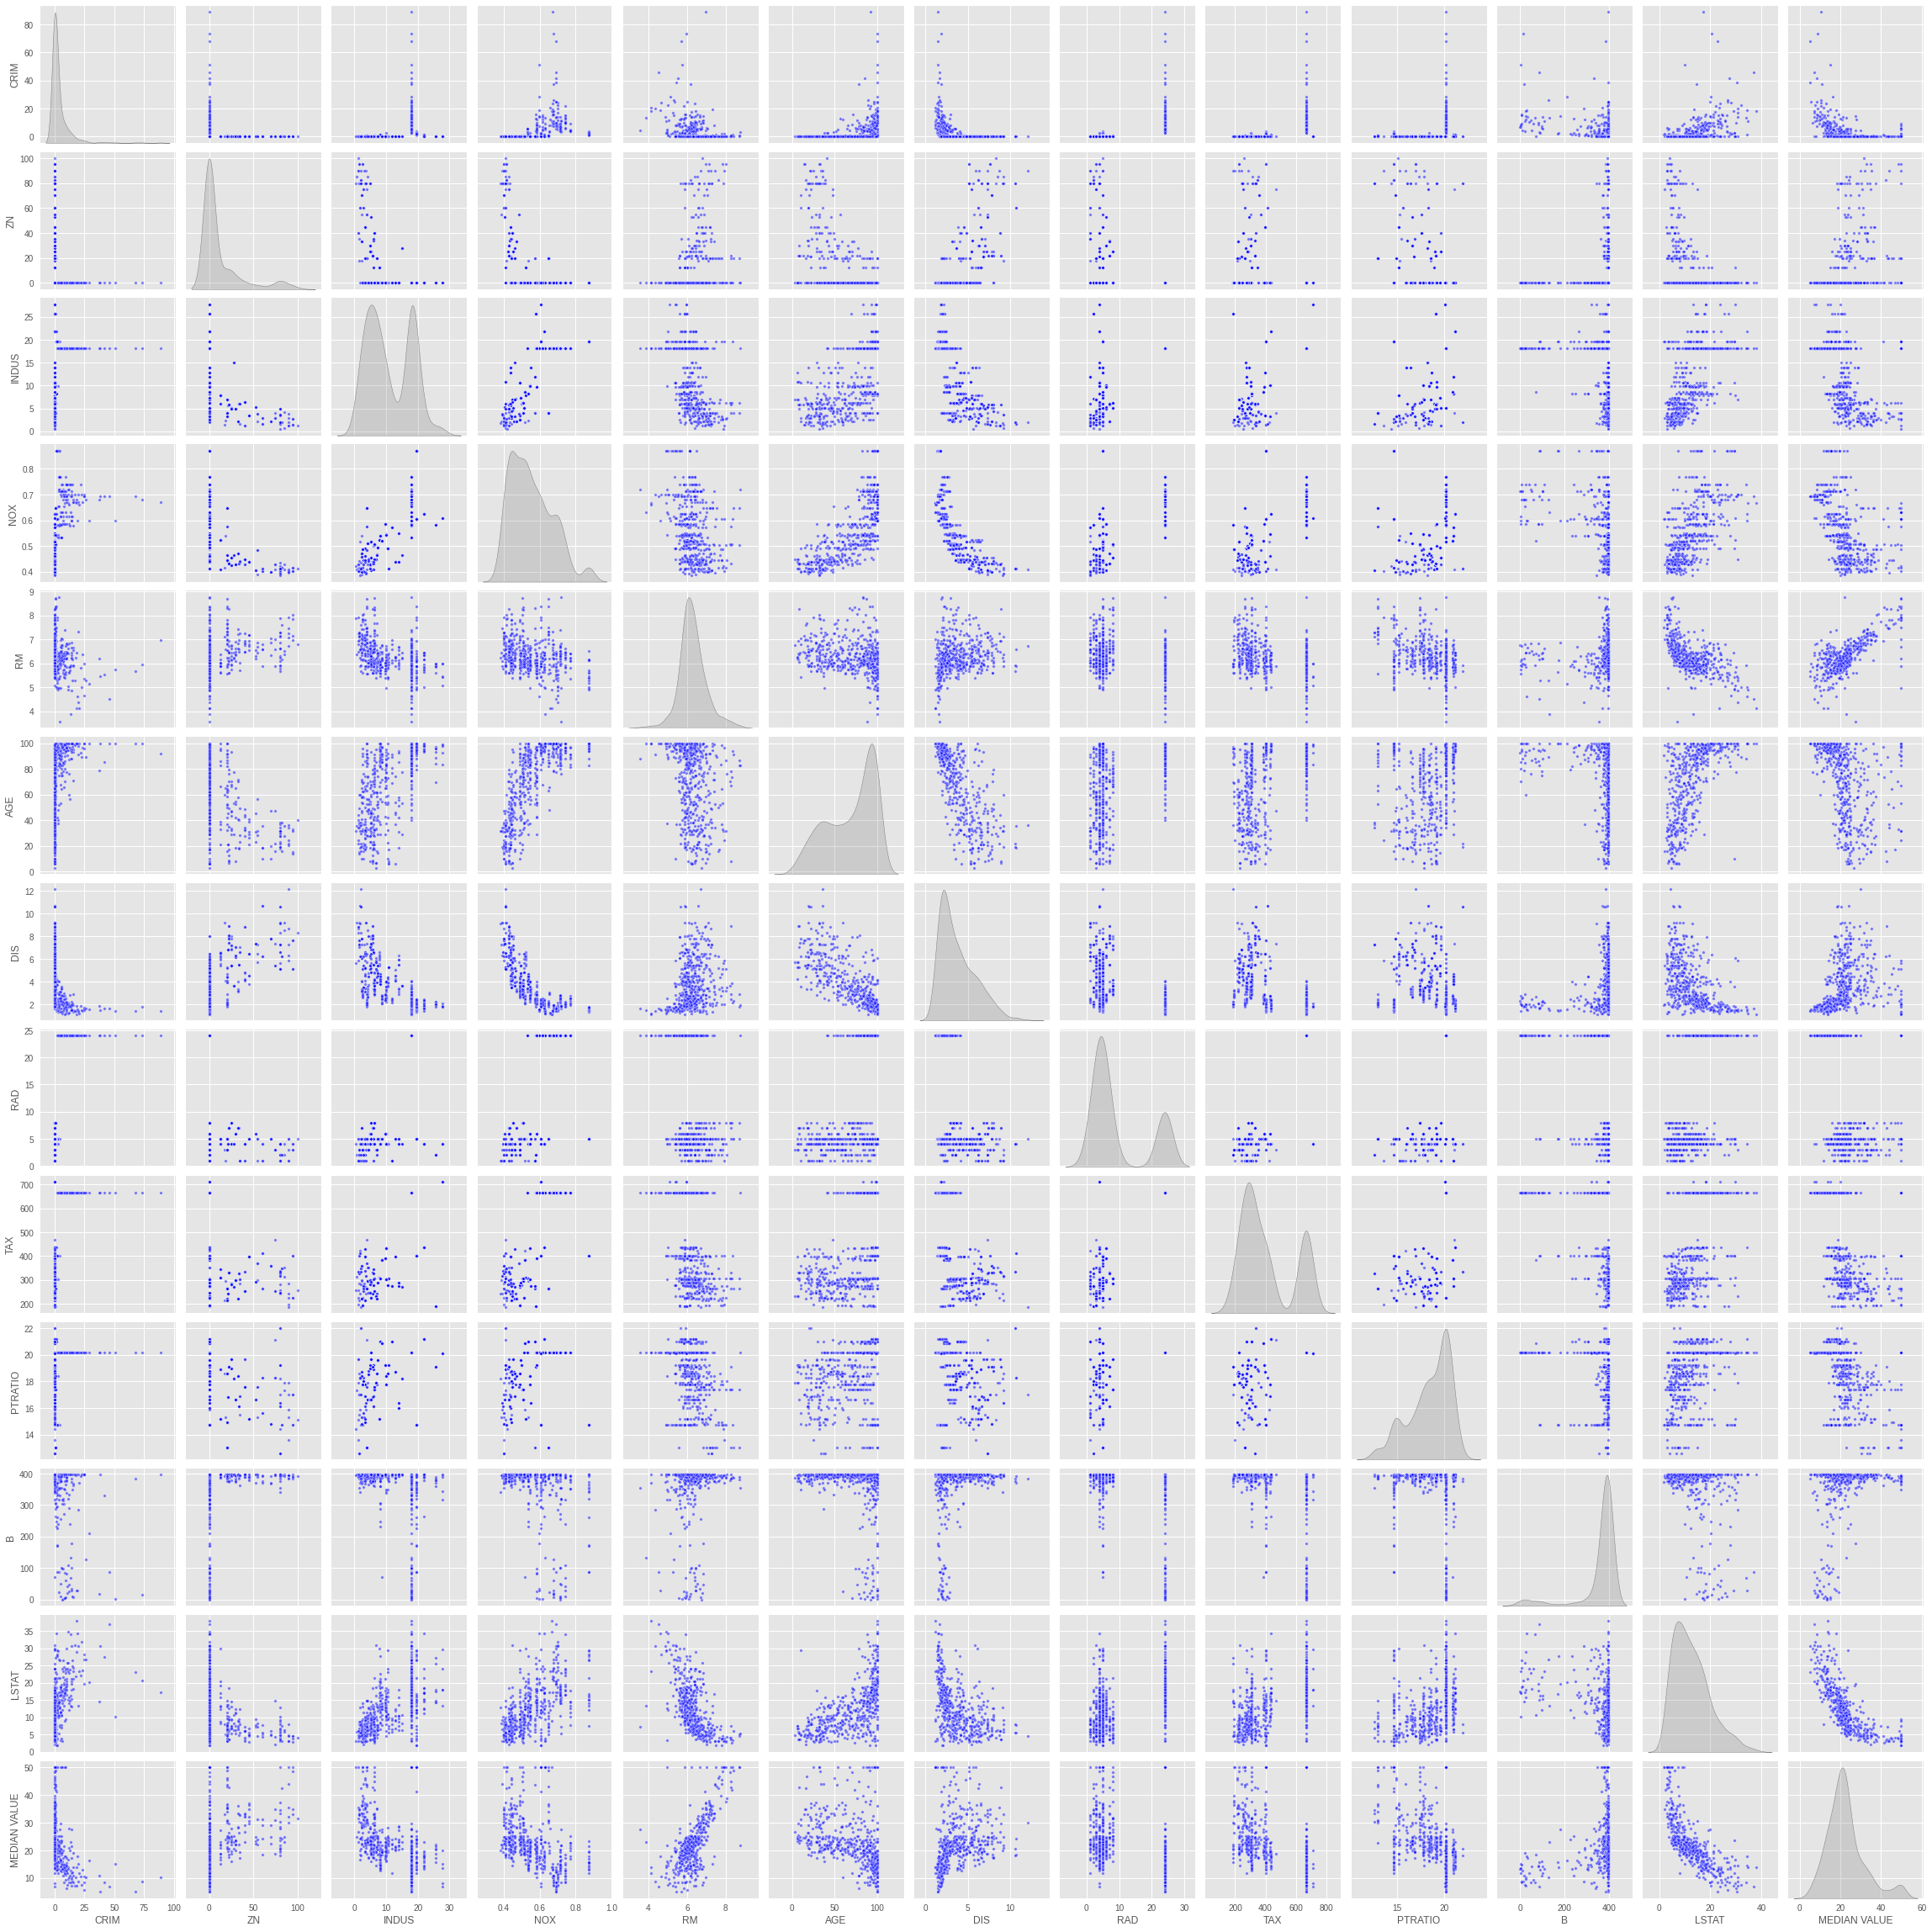

In [30]:
plt.style.use('ggplot')
sns.pairplot(data =boston.drop('CHAS' , axis = 1), plot_kws={'alpha': 0.5 ,'color':'blue'}
             ,diag_kws = {'color': 'grey'} ,markers= '.', diag_kind='kde' )
plt.show()

##Observations 

Cannot really see all the relationships easily, its better to plot heatmap for correlation matrix and check only the highly correlated features.


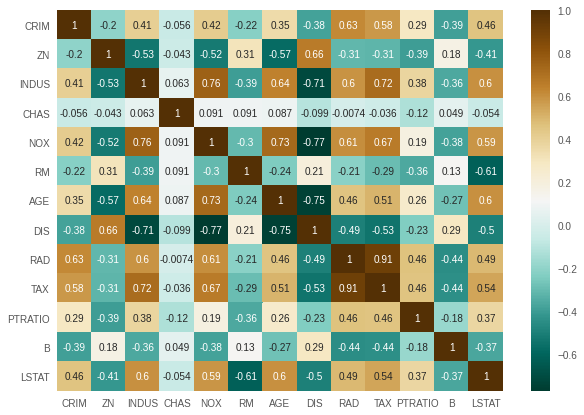

In [31]:
boston_pred = boston.drop('MEDIAN VALUE' , axis = 1) #because only asked for predictors 
corr = boston_pred.corr()
plt.figure(figsize = [10,7])
sns.heatmap(corr , annot= True , cmap = 'BrBG_r')
plt.show()

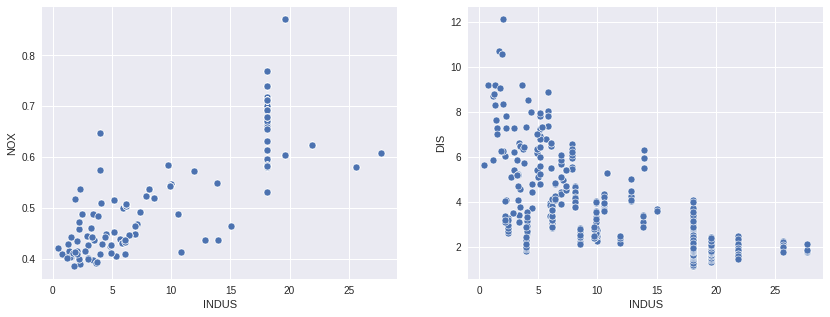

In [32]:
cols = ['NOX', 'DIS' ]
plt.style.use('seaborn')
plt.figure(figsize = [14,5])
for i in range(1,len(cols)+1): 
    plt.subplot(1,2,i)
    sns.scatterplot(data = boston_pred , x = 'INDUS' , y = cols[i-1])
plt.show()

## Observations
1. Indus looks positively correlated with NOX for INDUS values less than 10. so , high proportion of non-retail business acres per town is correlated with nitric oxide concentration , probably due to the industries or the traffic it generates.
2. Indus is negatively correlated with DIS, so the employement centres are near to the areas having high proportion of non-retail business.

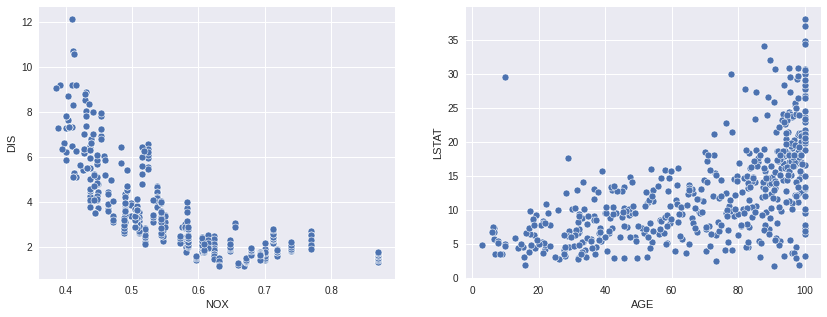

In [33]:
fig , (ax1, ax2) = plt.subplots(1,2 , figsize = [14,5])

sns.scatterplot(data = boston , x ='NOX', y = 'DIS' , ax= ax1)
sns.scatterplot(data = boston, x = 'AGE' , y = 'LSTAT' , ax = ax2)
plt.show() #nos and age

## Observation 
1. NOX is negatively correlated with DIS, which was somewhat expected since in most employment centres, some machinery will be used which will generate high amount of nitric oxide.
2. LSTAT is looks positively correlated with AGE, the proportion of house build prior to 1940 is correlated with percentage of lower status of the population.

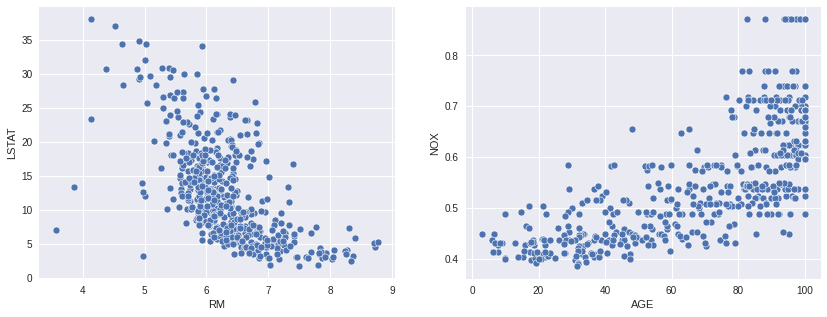

In [34]:
fig , (ax1, ax2) = plt.subplots(1,2 , figsize = [14,5])

sns.scatterplot(data = boston , x ='RM', y = 'LSTAT' , ax= ax1)
sns.scatterplot(data = boston, x = 'AGE' , y = 'NOX' , ax = ax2)
plt.show() 

##Observations 
1. LSTAT is negatively correlated with RM, which is expected because there will be on average more rooms in area having less percent of lower status of population.
2. NOX is positively correlated with AGE.

#Q-10 c)

In [35]:
#finding predictors associated with per capita crime rate

In [36]:
corr['CRIM']

CRIM       1.000000
ZN        -0.200469
INDUS      0.406583
CHAS      -0.055892
NOX        0.420972
RM        -0.219247
AGE        0.352734
DIS       -0.379670
RAD        0.625505
TAX        0.582764
PTRATIO    0.289946
B         -0.385064
LSTAT      0.455621
Name: CRIM, dtype: float64

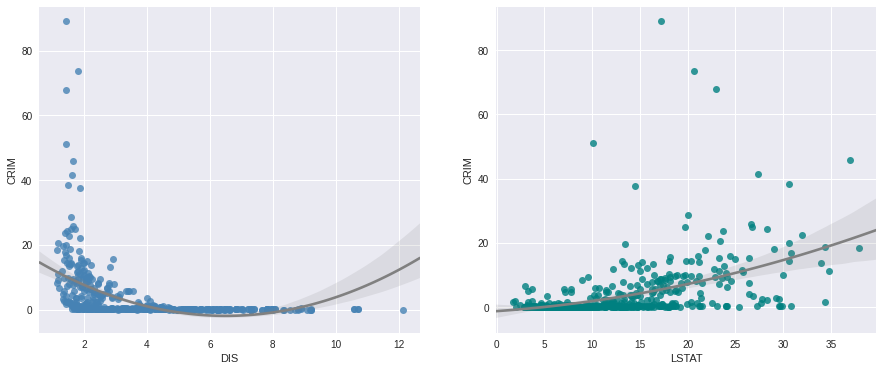

In [37]:
fig , (ax1 , ax2) = plt.subplots(1,2 , figsize = [15,6])
sns.regplot(data = boston_pred , y = 'CRIM' , x = 'DIS' , order = 2 , truncate = False , line_kws={'color':'grey'} , ax= ax1 ,  color = '#4682B4')
sns.regplot(data = boston_pred , y = 'CRIM' , x = 'LSTAT' , order = 2 , truncate = False , line_kws={'color':'grey'} , ax = ax2 , color = '#008080')
plt.show()

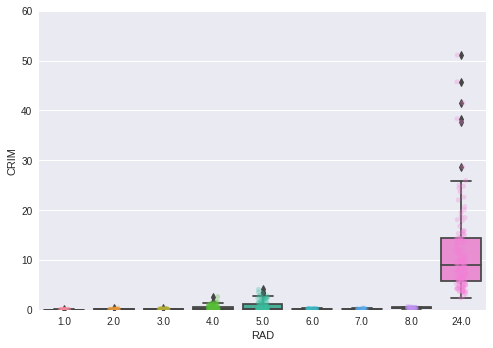

In [38]:
sns.boxplot(data = boston , y= 'CRIM' , x = 'RAD')
sns.stripplot(data = boston_pred , x = 'RAD' , y = 'CRIM' , alpha = 0.3)

plt.ylim(0,60)
plt.show()

##Observations 
1. CRIM is associated with DIS and LSTAT, both relationships are non-linear. Crime rates are higher of areas having more percent of lower status people.
2. Also it is seen that there is higher crime rate in the area having higher index of highway accesibility (RAD = 24) 

#Q-10 d)

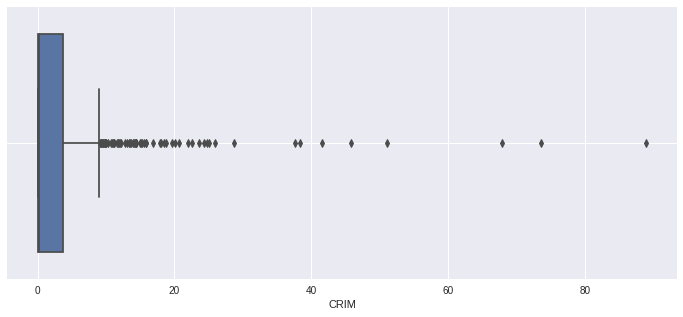

In [39]:
plt.style.use('seaborn-dark')
plt.figure(figsize = [12,5])
sns.boxplot(data = boston_pred , x = 'CRIM' )
plt.grid()
plt.show()

In [40]:
#let's inspect 
print(f"CRIM range is {np.min(boston_pred['CRIM'])} - {np.max(boston_pred['CRIM'])}")
print('The median value of CRIM is ', np.median(boston_pred['CRIM']))
print('The 75th percentile of CRIM is ', np.percentile(boston_pred['CRIM'], 75))
# but there are still a lot of points above the IQR range 
# Let's check for the 90th percentile 
print('The 90th percentile of CRIM is ', np.percentile(boston_pred['CRIM'], 90))

CRIM range is 0.00632 - 88.9762
The median value of CRIM is  0.25651
The 75th percentile of CRIM is  3.6770825
The 90th percentile of CRIM is  10.753


In [41]:
print(f"There are {len(boston_pred[boston_pred['CRIM'] > 3.677])} number of points above 90th percentile.")
# lets take a look at the data
print(boston_pred[boston_pred['CRIM'] > 3.677]) 


There are 127 number of points above 90th percentile.
        CRIM   ZN  INDUS  CHAS    NOX  ...   RAD    TAX  PTRATIO       B  LSTAT
143  4.09740  0.0  19.58   0.0  0.871  ...   5.0  403.0     14.7  396.90  26.42
356  8.98296  0.0  18.10   1.0  0.770  ...  24.0  666.0     20.2  377.73  17.60
357  3.84970  0.0  18.10   1.0  0.770  ...  24.0  666.0     20.2  391.34  13.27
358  5.20177  0.0  18.10   1.0  0.770  ...  24.0  666.0     20.2  395.43  11.48
359  4.26131  0.0  18.10   0.0  0.770  ...  24.0  666.0     20.2  390.74  12.67
..       ...  ...    ...   ...    ...  ...   ...    ...      ...     ...    ...
480  5.82401  0.0  18.10   0.0  0.532  ...  24.0  666.0     20.2  396.90  10.74
481  5.70818  0.0  18.10   0.0  0.532  ...  24.0  666.0     20.2  393.07   7.74
482  5.73116  0.0  18.10   0.0  0.532  ...  24.0  666.0     20.2  395.28   7.01
486  5.69175  0.0  18.10   0.0  0.583  ...  24.0  666.0     20.2  392.68  14.98
487  4.83567  0.0  18.10   0.0  0.583  ...  24.0  666.0     20.2  

## Observation 
There are 127 number of points above 75th percentile. But looking at the data I can see most of the RAD values are 24 which is also associated with high values of CRIM. So , now I will try to look into that.

In [42]:
print('average RAD value for where CRIM is above its 75th percentile', np.average(boston_pred[boston_pred['CRIM'] > 3.677]['RAD']))
print('average RAD value for where CRIM is below its 75th percentile' , np.average(boston_pred[boston_pred['CRIM'] < 3.677]['RAD']))

average RAD value for where CRIM is above its 75th percentile 23.8503937007874
average RAD value for where CRIM is below its 75th percentile 4.757255936675461


### TAX Rates

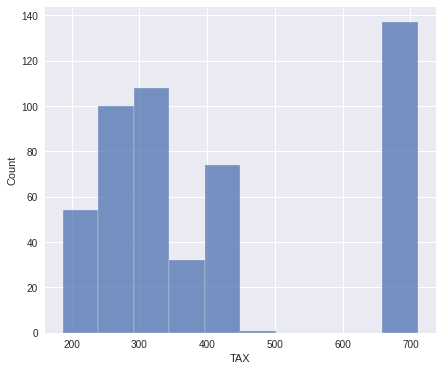

In [43]:
plt.style.use('seaborn')
plt.figure(figsize = [7,6])
sns.histplot(data = boston_pred , x = 'TAX'  )
plt.show()

In [44]:
print(f"TAX range is {np.min(boston_pred['TAX'])} - {np.max(boston_pred['TAX'])}")
# from the corr matrix , it is seen that TAX is highly correlated with RAD 
# So again people in the area having RAD = 24 are paying high TAXES

TAX range is 187.0 - 711.0


In [45]:
boston_pred[boston_pred['TAX'] > 600]['RAD'].value_counts()

24.0    132
4.0       5
Name: RAD, dtype: int64

### Pupil Teacher Ratio

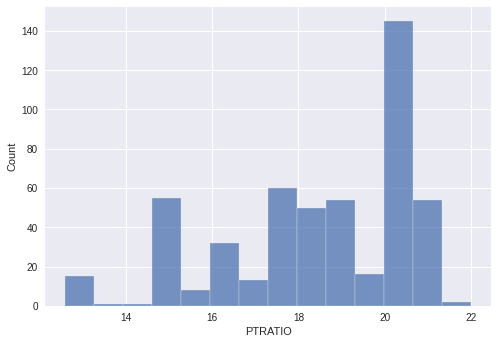

In [46]:
sns.histplot(data = boston_pred , x = 'PTRATIO')
plt.show()

In [47]:
print(f"PTRATIO range is {np.min(boston_pred['PTRATIO'])} - {np.max(boston_pred['PTRATIO'])}")
#there isnt any particular outlier , but many have high value of ptratio which is 20 

PTRATIO range is 12.6 - 22.0


##Q-10 e)

In [48]:
boston_pred['CHAS'].value_counts()
## 35 suburbs are bounded by the Charles river

0.0    471
1.0     35
Name: CHAS, dtype: int64

## Q-10 f)

In [49]:
print(f"Median ptratio is {np.median(boston_pred['PTRATIO'])}")

Median ptratio is 19.05


## Q10 g)

In [50]:
boston[boston['MEDIAN VALUE'] == np.min(boston['MEDIAN VALUE'])]

CRIM   ZN  INDUS  CHAS  ...  PTRATIO       B  LSTAT  MEDIAN VALUE
398  38.3518  0.0   18.1   0.0  ...     20.2  396.90  30.59           5.0
405  67.9208  0.0   18.1   0.0  ...     20.2  384.97  22.98           5.0

[2 rows x 14 columns]

In [51]:
#median values 
median = pd.DataFrame([[np.median(boston.iloc[:,i]) for i in range(14)]]  ,columns= boston.columns , index = ['median'])
median

CRIM   ZN  INDUS  CHAS  ...  PTRATIO       B  LSTAT  MEDIAN VALUE
median  0.25651  0.0   9.69   0.0  ...    19.05  391.44  11.36          21.2

[1 rows x 14 columns]

## Observations 
 CRIM is super high for minimum values, and INDUS value is quite low also the RAD is max(24),LSTAT and the TAX is high for the minimum median house value  

##Q-10 h)

In [52]:
print('Number of suburbs having more than 7 rooms per dwelling -' , len(boston[boston['RM'] >7]))

Number of suburbs having more than 7 rooms per dwelling - 64


In [53]:
print('Number of suburbs having more than 8 rooms per dwelling -' , len(boston[boston['RM'] >8]))

Number of suburbs having more than 8 rooms per dwelling - 13


In [54]:
boston[boston['RM'] >8]

CRIM    ZN  INDUS  CHAS  ...  PTRATIO       B  LSTAT  MEDIAN VALUE
97   0.12083   0.0   2.89   0.0  ...     18.0  396.90   4.21          38.7
163  1.51902   0.0  19.58   1.0  ...     14.7  388.45   3.32          50.0
204  0.02009  95.0   2.68   0.0  ...     14.7  390.55   2.88          50.0
224  0.31533   0.0   6.20   0.0  ...     17.4  385.05   4.14          44.8
225  0.52693   0.0   6.20   0.0  ...     17.4  382.00   4.63          50.0
226  0.38214   0.0   6.20   0.0  ...     17.4  387.38   3.13          37.6
232  0.57529   0.0   6.20   0.0  ...     17.4  385.91   2.47          41.7
233  0.33147   0.0   6.20   0.0  ...     17.4  378.95   3.95          48.3
253  0.36894  22.0   5.86   0.0  ...     19.1  396.90   3.54          42.8
257  0.61154  20.0   3.97   0.0  ...     13.0  389.70   5.12          50.0
262  0.52014  20.0   3.97   0.0  ...     13.0  386.86   5.91          48.8
267  0.57834  20.0   3.97   0.0  ...     13.0  384.54   7.44          50.0
364  3.47428   0.0  18.10   1.0  ...     20.2  354.55   5.29          21.9

[13 rows x 14 columns]

In [55]:
# lets take the median for these values and compare with suburbs having less than 8 rooms per dwelling 
pd.DataFrame([np.median(boston[boston['RM'] >8] , axis = 0) , np.percentile(boston[boston['RM'] >8] , 75 ,axis = 0) ,
              np.percentile(boston[boston['RM'] >8] , 90 ,axis = 0) ]
             , columns = boston.columns , index = ['Median' , '75th Percentile', '90th Percentile'])


CRIM    ZN  INDUS  ...       B  LSTAT  MEDIAN VALUE
Median           0.520140   0.0   6.20  ...  386.86  4.140          48.3
75th Percentile  0.578340  20.0   6.20  ...  389.70  5.120          50.0
90th Percentile  1.337524  21.6  15.72  ...  395.63  5.786          50.0

[3 rows x 14 columns]

In [56]:
#suburbs having less than 8 rooms per dwelling 
pd.DataFrame([np.median(boston[boston['RM'] <8] , axis = 0) , np.percentile(boston[boston['RM'] <8] , 75 ,axis = 0) ,
              np.percentile(boston[boston['RM'] <8] , 90 ,axis = 0)]
             , columns = boston.columns , index = ['Median' , '75th Percentile' , '90th Percentile'])


CRIM    ZN  INDUS  ...       B  LSTAT  MEDIAN VALUE
Median            0.24522   0.0   9.69  ...  391.83  11.65         21.00
75th Percentile   3.77498  12.5  18.10  ...  396.24  17.11         24.80
90th Percentile  11.03676  44.0  19.58  ...  396.90  23.21         32.98

[3 rows x 14 columns]

##Observations
1. The largest difference is in the LSTAT variable, for RM > 8 it is significantly less than RM < 8.
2. The median and the percentiles for CRIM is also reduced in the RM > 8
3. INDUS , NOX, AGE , DIS , TAX and PTRATIO are slightly on the lower side for RM > 8.
4. While the 7th percentile for RAD in RM < 8 is 24, but there is only a single instance of RAD = 24 in RM > 8.  